In [1]:
#importing keras libraries and other libraries
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [35]:
#define the ConvNetaticmethod
class LeNet:
    @staticmethod
    def build(input_shape,classes):
        model=Sequential()
        #CONV => RELU => POOL
        model.add(Conv2D(20,kernel_size=5,padding="same",
                 input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),dim_ordering="th"))
        #CONV => RELU => POOL
        model.add(Conv2D(50,kernel_size=5,border_mode="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),dim_ordering="th"))
        #Flatten => RELU
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        #softmax
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model
        

In [36]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [37]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#k.set_image_dim_ordering("th")
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [38]:
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [39]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [40]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
metrics=["accuracy"])
history = model.fit(X_train, y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

/home/devendra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
  # Remove the CWD from sys.path while we load stuff.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/home/devendra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`
  if sys.path[0] == '':
/home/devendra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), data_format="channels_first")`
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 5s 108us/step - loss: 0.4515 - acc: 0.8666 - val_loss: 0.1640 - val_acc: 0.9487
Epoch 2/20
48000/48000 [==============================] - 5s 96us/step - loss: 0.1326 - acc: 0.9591 - val_loss: 0.1243 - val_acc: 0.9623
Epoch 3/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.0955 - acc: 0.9704 - val_loss: 0.0859 - val_acc: 0.9753
Epoch 4/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.0763 - acc: 0.9763 - val_loss: 0.0874 - val_acc: 0.9742
Epoch 5/20
48000/48000 [==============================] - 4s 85us/step - loss: 0.0639 - acc: 0.9805 - val_loss: 0.0679 - val_acc: 0.9778
Epoch 6/20
48000/48000 [==============================] - 4s 86us/step - loss: 0.0556 - acc: 0.9829 - val_loss: 0.0667 - val_acc: 0.9801
Epoch 7/20
48000/48000 [==============================] - 4s 88us/step - loss: 0.0497 - acc: 0.9845 - val_loss: 0.0584 - val_ac

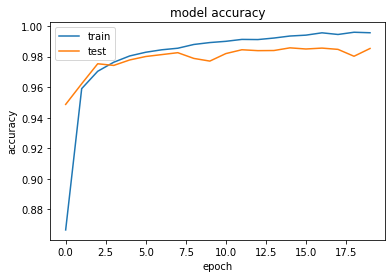

In [41]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

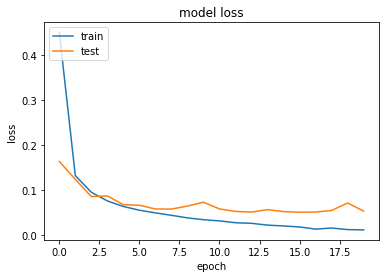

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()